# (1) Scrape the Common Sense Media webiste for Album Ratings

In [5]:
import requests
%matplotlib inline
from IPython.display import Image, display
from bs4 import BeautifulSoup
import csv

n_page = 111
url_base = "https://www.commonsensemedia.org/music-reviews?sort=field_review_recommended_age&order=asc&page="
count = 0
header = ['Age', 'Title', 'Artist', 'Year', 'Description']

with open("Albums.csv", "w", newline='') as f:
    writer = csv.writer(f, delimiter='\t')
    writer.writerow(header) # write the header

    for page in range(0, n_page):
        url = url_base+str(page)
        response = requests.get(url) 
        soup = BeautifulSoup(response.content, 'html.parser')
        tags = soup.find('div', class_ = "view-content").findAll('div', recursive = False)  

        for tag in tags:
            age = tag.find('div', class_="csm-green-age").text
            title = tag.find('div', class_="title-data-wrapper").strong.text
            artist = tag.find('em', class_ ="field-content").text
            description = tag.find('div', class_="views-field views-field-field-one-liner one-liner").text
            year = tag.find('span', class_="nowrap-date").text
            writer.writerow([age, title, artist, year, description])
            count += 1

print ("Obtained the data for {} albums.\nSave the data to {}.".format(count, "Albums.csv"))
    

Obtained the data for 2206 albums.
Save the data to Albums.csv.


# Divide the album into 7 Age-Groups

In [13]:
import pandas as pd
df = pd.read_csv("Albums.csv", delimiter = "\t")
df['Age'] = df['Age'].apply(lambda s: int(s.replace("age ","").replace("+","")))

def age_group(age):
    if age < 4: return "Toodler"
    elif age < 6: return "Pre-Schooler"
    elif age < 9: return "Middle Childhood 1"
    elif age < 12: return "Middle Childhood 2"
    elif age < 15: return "Young Teen"
    elif age < 18: return "Teenager"
    else: return "Adult"
    
df['Age Group'] = df['Age'].apply(age_group)
custom_dict = {'Toodler': 0, 'Pre-Schooler': 2, 'Middle Childhood 1': 3,'Middle Childhood 2': 4,
               "Young Teen": 5, "Teenager": 6, "Adult": 7 } 
        
df.to_csv("Album_AgeGroup.csv", index = False)

df_temp = pd.read_csv("Album_AgeGroup.csv")
df_temp.head()

,Age,Title,Artist,Year,Description,Age Group
0,2,Sesame Street: Halloween Collection,Sesame Street,2012,"Playful, not-so-spooky Halloween songs for th...",Toodler
1,2,A Child's Celebration of Rock 'n' Roll,Various Artists,1996,Songs to get toddlers and teens energized.,Toodler
2,2,Wake up Jeff,The Wiggles,2000,Songs and scenes certain to keep kids attenti...,Toodler
3,2,Toot Toot!,The Wiggles,2001,Gets little couch potatoes up and moving.,Toodler
4,2,A Child's Celebration of Classical Music,Various Artists,1999,Talented celebs promote classics for kids.,Toodler


# Count the number of albums in each age-group

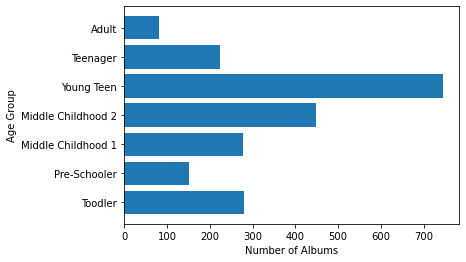

In [15]:
df_age = df.groupby('Age Group').size()
df_age = df_age.sort_index(key = lambda x: x.map(custom_dict))

import matplotlib.pyplot as plt

x = df_age.index
y = df_age.values
ind = range(len(y))

fig, ax = plt.subplots()
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.set_xlabel('Number of Albums')
ax.set_ylabel('Age Group')
plt.savefig("plot1_Albums_vs_AgeGroup.jpg", bbox_inches='tight')
plt.show()
#plt.gcf().savefig("albums.jpg", bbox_inches='tight')
